# Data Visualization

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  Loading Data

In [70]:
wine_statistics=pd.read_csv('\\Datasets and Projects\\WINE QUALITY\\Wine\\Data\\Processed\\Wine statistics(processed data).csv')
wine_statistics.head()

,Name,Year,Rating,Verdict,Color,Intensity,Aroma,Sweetness,Acidity,Alcohol,Tannin,Balance,Finish,Aftertaste
0,"EQUINOX, Luchineasa",2020,90.7,nice,9.0,9.0,9.4,9.0,8.9,8.9,8.9,8.9,8.9,8.4
1,"BAHU WINERY, Sauvignon Blanc",2020,89.8,nice,9.4,9.4,9.3,8.9,8.3,8.2,8.2,8.2,8.2,8.2
2,"CRAMA BAUER, Feteasca Alba",2019,91.9,fine,9.6,9.6,9.5,9.1,9.1,9.1,9.0,9.0,9.0,8.9
3,"BOUCHIÉ-CHATELLIER, Argile à Silex, Pouilly-Fumé",2019,92.8,fine,9.7,9.6,9.5,9.2,9.2,9.2,9.2,9.1,9.1,9.0
4,"RASOVA, Nud",2020,92.0,fine,9.5,9.5,9.4,9.2,9.2,9.1,9.1,9.0,9.0,9.0


### Wines by Verdict

In [71]:
by_verdict = wine_statistics['Verdict'].value_counts()
print(by_verdict)

nice     417
fine     295
fair     103
great     57
Name: Verdict, dtype: int64


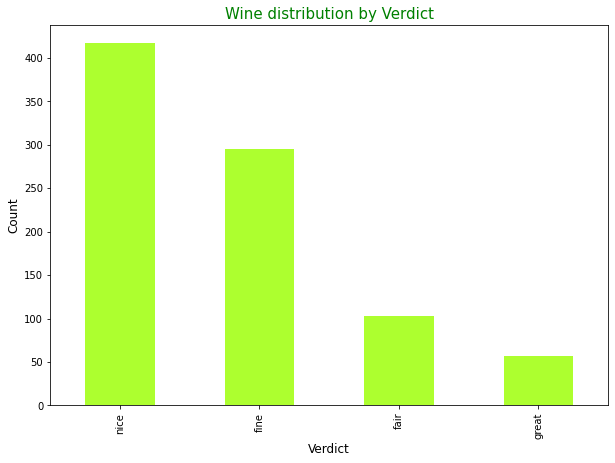

In [72]:
plt.figure(figsize = (10, 7))
plt.title('Wine distribution by Verdict', fontsize=15, color='green')
by_verdict.plot(kind = 'bar', color = '#ADFF2F')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Verdict', fontsize=12)
plt.show()

### Wine Characteristics Distributions

In [73]:
distribution = wine_statistics.drop(['Name', 'Year', 'Verdict', 'Rating'], axis = 1)
distribution = distribution.describe()

In [74]:
distribution

,Color,Intensity,Aroma,Sweetness,Acidity,Alcohol,Tannin,Balance,Finish,Aftertaste
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,9.458716,9.490367,9.524312,8.900917,8.858486,8.884977,8.855734,8.847248,8.950344,8.779587
std,0.192910,0.153262,0.230371,0.334196,0.347431,0.198366,0.234879,0.338046,0.214941,0.241210
min,8.500000,8.400000,7.500000,1.000000,1.000000,7.000000,7.000000,1.000000,8.000000,7.000000
25%,9.400000,9.400000,9.500000,8.800000,8.800000,8.800000,8.700000,8.800000,8.800000,8.700000
50%,9.500000,9.500000,9.600000,8.900000,8.900000,8.900000,8.800000,8.800000,8.900000,8.800000
75%,9.600000,9.600000,9.700000,9.000000,9.000000,9.000000,9.000000,9.000000,9.100000,8.900000
max,10.000000,9.800000,9.900000,9.700000,9.700000,9.700000,9.700000,9.500000,9.600000,9.500000


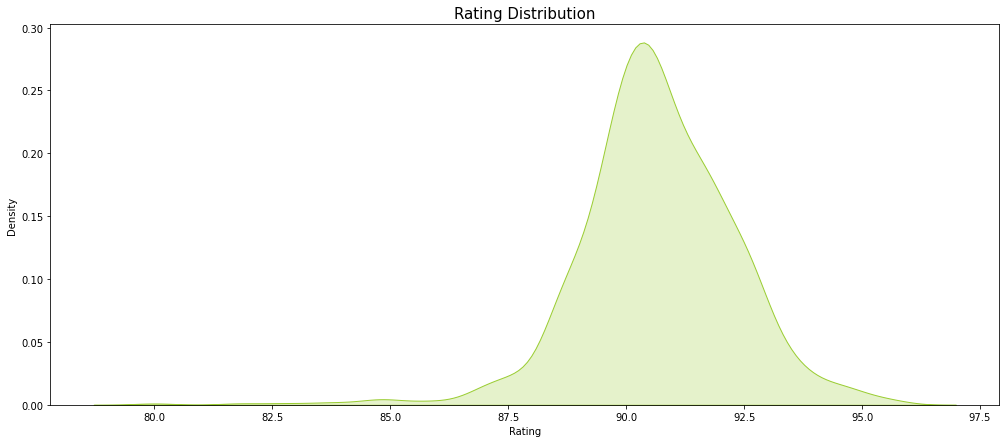

In [65]:
plt.figure(figsize = (17, 7))
plt.title('Rating Distribution', fontsize=15)
sns.kdeplot(data=wine_statistics['Rating'], shade=True, color = '#9ACD32')
plt.show()

In [75]:
characteristics = wine_statistics.drop(['Name', 'Year', 'Verdict', 'Rating'], axis = 1)

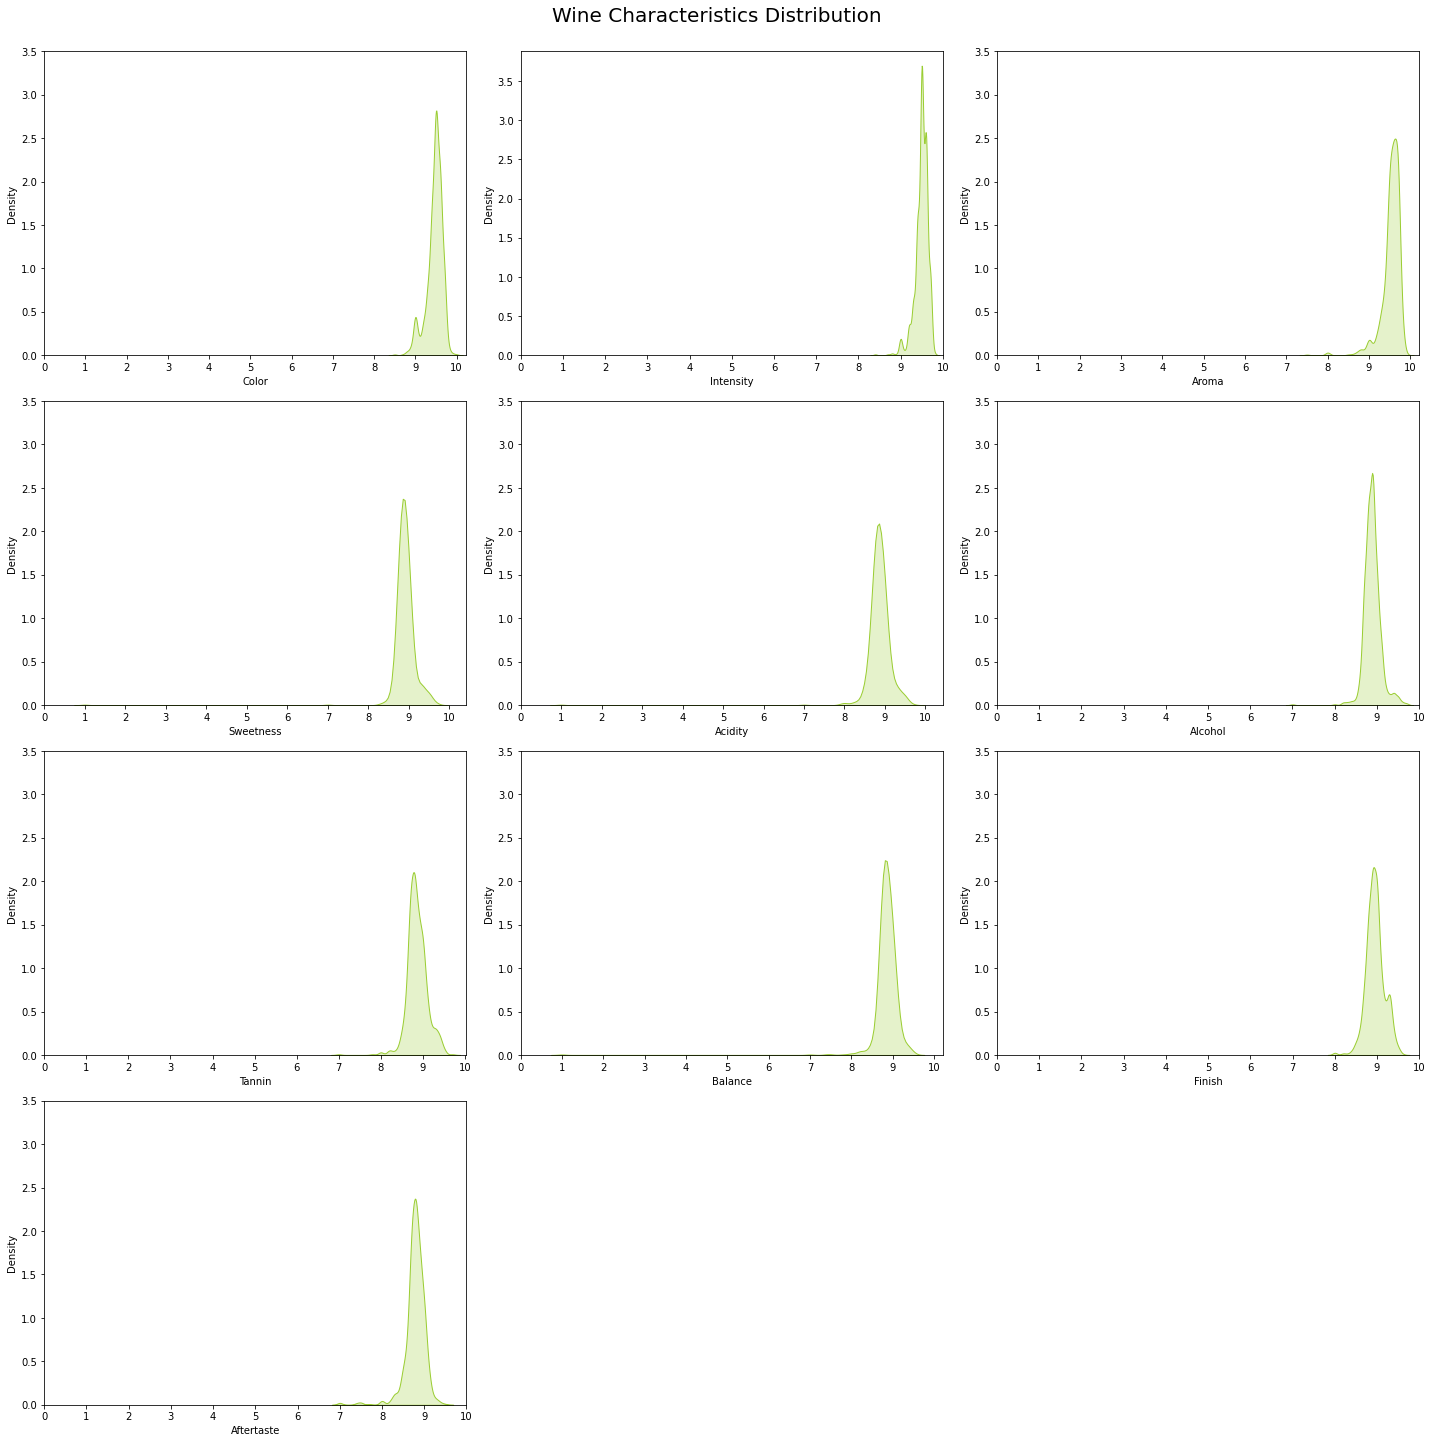

In [130]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(characteristics.columns, 1):
    plt.subplot(4,3,i)
    sns.kdeplot(data=characteristics[column], shade=True, color = '#9ACD32')
    plt.xticks(np.arange(0, 11, step=1))
    plt.yticks(np.arange(0, 4, step=0.5))

plt.suptitle('Wine Characteristics Distribution', fontsize=20, y=1)
plt.tight_layout()
plt.show()

### Characteristics correlation

In [131]:
correlation = wine_statistics.drop(['Name', 'Year', 'Verdict'], axis = 1)

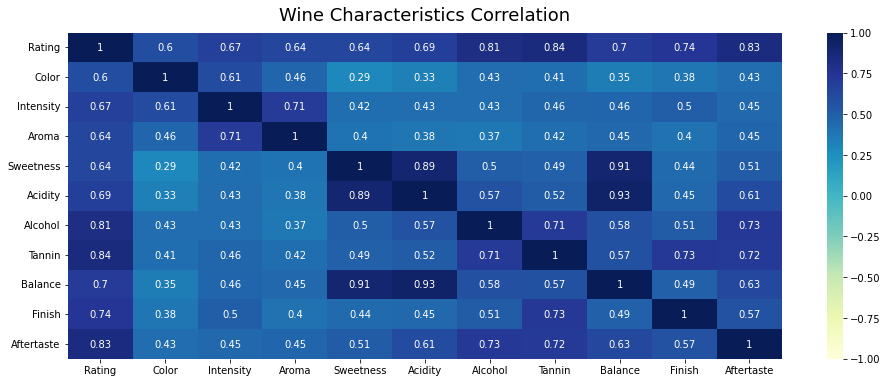

In [136]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Wine Characteristics Correlation', fontdict={'fontsize':18}, pad=12)
plt.show()

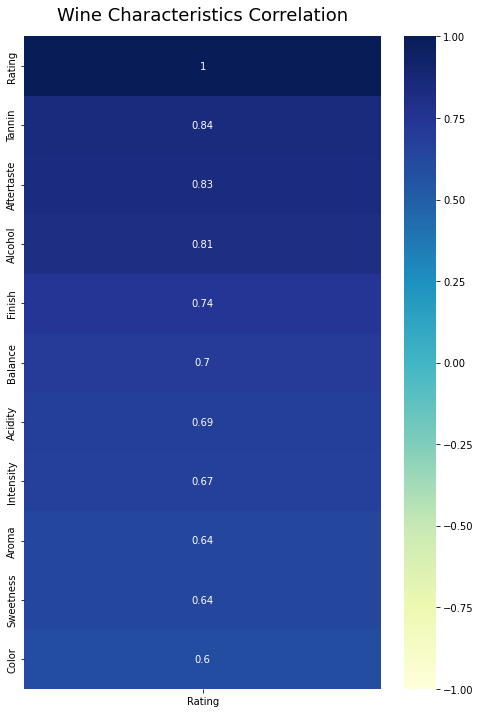

In [137]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(correlation.corr()[['Rating']].sort_values(by='Rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Wine Characteristics Correlation', fontdict={'fontsize':18}, pad=16)
plt.show()